In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

# Flight Data

In [108]:
df = pd.read_csv('../data/raw/flights.csv', parse_dates=True)
df.head()

/var/folders/8l/_qddcffx71x8s26pmmgqthdm0000gq/T/ipykernel_1076/3237892480.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/flights.csv', parse_dates=True)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Glossary

- FL_DATE = Date of the Flight
- OP_CARRIER = Airline Identifier
- OP_CARRIER_FL_NUM = Flight Number
- ORIGIN = Starting Airport Code
- DEST = Destination Airport Code
- CRS_DEP_TIME = Planned Departure Time
- DEP_TIME = Actual Departure Time
- DEP_DELAY = Total Delay on Departure in minutes
- TAXI_OUT = The time duration elapsed between departure from the origin airport gate and wheels off
- WHEELS_OFF = The time point that the aircraft's wheels leave the ground
- WHEELS_ON = The time point that the aircraft'ss wheels touch on the ground
- TAXI_IN = The time duration elapsed between wheels-on and gate arrival at the destination airport
- CRS_ARR_TIME = Planned arrival time
- ARR_TIME = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL
- ARR_DELAY = Total Delay on Arrival in minutes
- CANCELLED = Flight Cancelled (1 = cancelled)
- CANCELLATION_CODE = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
- DIVERTED = Aircraft landed on different airport that the one scheduled
- CRS_ELAPSED_TIME = Planned amount of time needed for the flight trip
- ACTUAL_ELAPSED_TIME = AIR_TIME+TAXI_IN+TAXI_OUT
- AIR_TIME = The time duration between wheels_off and wheels_on time
- DISTANCE = Distance between two airports
- CARRIER_DELAY = Delay caused by the airline in minutes
- WEATHER_DELAY = Delay caused by weather
- NAS_DELAY = Delay caused by air system
- SECURITY_DELAY = caused by security reasons
- LATE_AIRCRAFT_DELAY = Delay caused by security

In [109]:
df.shape

(5819079, 31)

In [110]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [111]:
cols = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_TIME', 'ARRIVAL_TIME', 'AIR_TIME', 'DISTANCE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DIVERTED', 'WEATHER_DELAY']
df[cols]

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY
0,2015,1,1,4,98,AS,N407AS,ANC,SEA,2354.0,408.0,169.0,1448,-11.0,-22.0,0,NaN
1,2015,1,1,4,2336,AA,N3KUAA,LAX,PBI,2.0,741.0,263.0,2330,-8.0,-9.0,0,NaN
2,2015,1,1,4,840,US,N171US,SFO,CLT,18.0,811.0,266.0,2296,-2.0,5.0,0,NaN
3,2015,1,1,4,258,AA,N3HYAA,LAX,MIA,15.0,756.0,258.0,2342,-5.0,-9.0,0,NaN
4,2015,1,1,4,135,AS,N527AS,SEA,ANC,24.0,259.0,199.0,1448,-1.0,-21.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,688,B6,N657JB,LAX,BOS,2355.0,753.0,272.0,2611,-4.0,-26.0,0,NaN
5819075,2015,12,31,4,745,B6,N828JB,JFK,PSE,2355.0,430.0,195.0,1617,-4.0,-16.0,0,NaN
5819076,2015,12,31,4,1503,B6,N913JB,JFK,SJU,2350.0,432.0,197.0,1598,-9.0,-8.0,0,NaN
5819077,2015,12,31,4,333,B6,N527JB,MCO,SJU,2353.0,330.0,144.0,1189,-6.0,-10.0,0,NaN


## Joining the data with the airlines

In [112]:
df_merged = pd.DataFrame()

In [113]:
airline = pd.read_csv('../data/raw/airlines.csv')
df_merged = df[cols].merge(airline, left_on='AIRLINE', right_on='IATA_CODE', suffixes=('_CODE', '_NAME'))
df_merged.drop('IATA_CODE', axis=1, inplace=True)
df_merged

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY,AIRLINE_NAME
0,2015,1,1,4,98,AS,N407AS,ANC,SEA,2354.0,408.0,169.0,1448,-11.0,-22.0,0,NaN,Alaska Airlines Inc.
1,2015,1,1,4,135,AS,N527AS,SEA,ANC,24.0,259.0,199.0,1448,-1.0,-21.0,0,NaN,Alaska Airlines Inc.
2,2015,1,1,4,108,AS,N309AS,ANC,SEA,41.0,455.0,173.0,1448,-4.0,-14.0,0,NaN,Alaska Airlines Inc.
3,2015,1,1,4,122,AS,N413AS,ANC,PDX,46.0,507.0,187.0,1542,-4.0,-18.0,0,NaN,Alaska Airlines Inc.
4,2015,1,1,4,130,AS,N457AS,FAI,SEA,107.0,545.0,186.0,1533,-8.0,-3.0,0,NaN,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,769,VX,N622VA,LGA,DAL,1847.0,2154.0,231.0,1381,-8.0,-6.0,0,NaN,Virgin America
5819075,2015,12,31,4,357,VX,N284VA,BOS,SFO,1849.0,2204.0,357.0,2704,-10.0,-46.0,0,NaN,Virgin America
5819076,2015,12,31,4,1916,VX,N853VA,SFO,LAS,1933.0,2052.0,58.0,414,-7.0,-18.0,0,NaN,Virgin America
5819077,2015,12,31,4,490,VX,N840VA,LAX,LAS,1948.0,2044.0,39.0,236,-2.0,-11.0,0,NaN,Virgin America


In [114]:
df_merged.query('MONTH == 10')

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY,AIRLINE_NAME
129645,2015,10,1,4,20,AS,N423AS,14747,13930,42.0,622.0,192.0,1721,-8.0,-22.0,0,NaN,Alaska Airlines Inc.
129646,2015,10,1,4,122,AS,N565AS,10299,14057,46.0,509.0,189.0,1542,-4.0,-11.0,0,NaN,Alaska Airlines Inc.
129647,2015,10,1,4,94,AS,N469AS,10299,14747,48.0,455.0,171.0,1448,-7.0,-15.0,0,NaN,Alaska Airlines Inc.
129648,2015,10,1,4,128,AS,N306AS,11630,14747,111.0,530.0,179.0,1533,-14.0,-30.0,0,NaN,Alaska Airlines Inc.
129649,2015,10,1,4,136,AS,N468AS,10299,14747,201.0,609.0,170.0,1448,6.0,-5.0,0,NaN,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808126,2015,10,31,6,182,VX,N621VA,14771,11618,2230.0,531.0,283.0,2565,-5.0,-24.0,0,NaN,Virgin America
5808127,2015,10,31,6,260,VX,N849VA,12889,12478,2244.0,506.0,241.0,2248,-11.0,-49.0,0,NaN,Virgin America
5808128,2015,10,31,6,338,VX,N522VA,12892,11697,2252.0,537.0,269.0,2343,-3.0,-3.0,0,NaN,Virgin America
5808129,2015,10,31,6,358,VX,N842VA,14771,10721,2345.0,654.0,291.0,2704,-10.0,-41.0,0,NaN,Virgin America


## Joining the data with the airports

### Merge the airports with the destination airports

In [116]:
airports = pd.read_csv('../data/raw/airports.csv')
df_merged_destination = df_merged.merge(airports[['IATA_CODE', 'AIRPORT']], left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left')
df_merged_destination.drop('IATA_CODE', axis=1, inplace=True)
df_merged_destination.rename(columns={'AIRPORT': 'DESTINATION_AIRPORT_NAME'}, inplace=True)
df_merged_destination.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY,AIRLINE_NAME,DESTINATION_AIRPORT_NAME
0,2015,1,1,4,98,AS,N407AS,ANC,SEA,2354.0,408.0,169.0,1448,-11.0,-22.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport
1,2015,1,1,4,135,AS,N527AS,SEA,ANC,24.0,259.0,199.0,1448,-1.0,-21.0,0,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport
2,2015,1,1,4,108,AS,N309AS,ANC,SEA,41.0,455.0,173.0,1448,-4.0,-14.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport
3,2015,1,1,4,122,AS,N413AS,ANC,PDX,46.0,507.0,187.0,1542,-4.0,-18.0,0,NaN,Alaska Airlines Inc.,Portland International Airport
4,2015,1,1,4,130,AS,N457AS,FAI,SEA,107.0,545.0,186.0,1533,-8.0,-3.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport


### Add the origin and destination airports to the flights

In [117]:
df_merged = df_merged_destination.copy()

## Add new columns

In [118]:
df_merged['FLIGHT_DATE'] = pd.to_datetime(df_merged[['YEAR', 'MONTH', 'DAY']])
df_merged['Delayed'] = df_merged['ARRIVAL_DELAY'] > 15
df_merged.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY,AIRLINE_NAME,DESTINATION_AIRPORT_NAME,FLIGHT_DATE,Delayed
0,2015,1,1,4,98,AS,N407AS,ANC,SEA,2354.0,408.0,169.0,1448,-11.0,-22.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,2015-01-01,False
1,2015,1,1,4,135,AS,N527AS,SEA,ANC,24.0,259.0,199.0,1448,-1.0,-21.0,0,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,2015-01-01,False
2,2015,1,1,4,108,AS,N309AS,ANC,SEA,41.0,455.0,173.0,1448,-4.0,-14.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,2015-01-01,False
3,2015,1,1,4,122,AS,N413AS,ANC,PDX,46.0,507.0,187.0,1542,-4.0,-18.0,0,NaN,Alaska Airlines Inc.,Portland International Airport,2015-01-01,False
4,2015,1,1,4,130,AS,N457AS,FAI,SEA,107.0,545.0,186.0,1533,-8.0,-3.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,2015-01-01,False


## Cleaning the Data

In [119]:
df_merged.isnull().sum()

YEAR                              0
MONTH                             0
DAY                               0
DAY_OF_WEEK                       0
FLIGHT_NUMBER                     0
AIRLINE_CODE                      0
TAIL_NUMBER                   14721
ORIGIN_AIRPORT                    0
DESTINATION_AIRPORT               0
DEPARTURE_TIME                86153
ARRIVAL_TIME                  92513
AIR_TIME                     105071
DISTANCE                          0
DEPARTURE_DELAY               86153
ARRIVAL_DELAY                105071
DIVERTED                          0
WEATHER_DELAY               4755640
AIRLINE_NAME                      0
DESTINATION_AIRPORT_NAME     486165
FLIGHT_DATE                       0
Delayed                           0
dtype: int64

In [120]:
df_merged[df_merged.isnull().any(axis=1)].value_counts()

Series([], dtype: int64)

In [121]:
def percent_hbar(df, old_threshold=None):
    sns.set()
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(20, 16), color='#86bf91', legend=False, fontsize=17)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, .10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    plt.title('Percentage of Missing Values (from {:,} rows)'.format(len(df)), fontsize=20)
    plt.show()

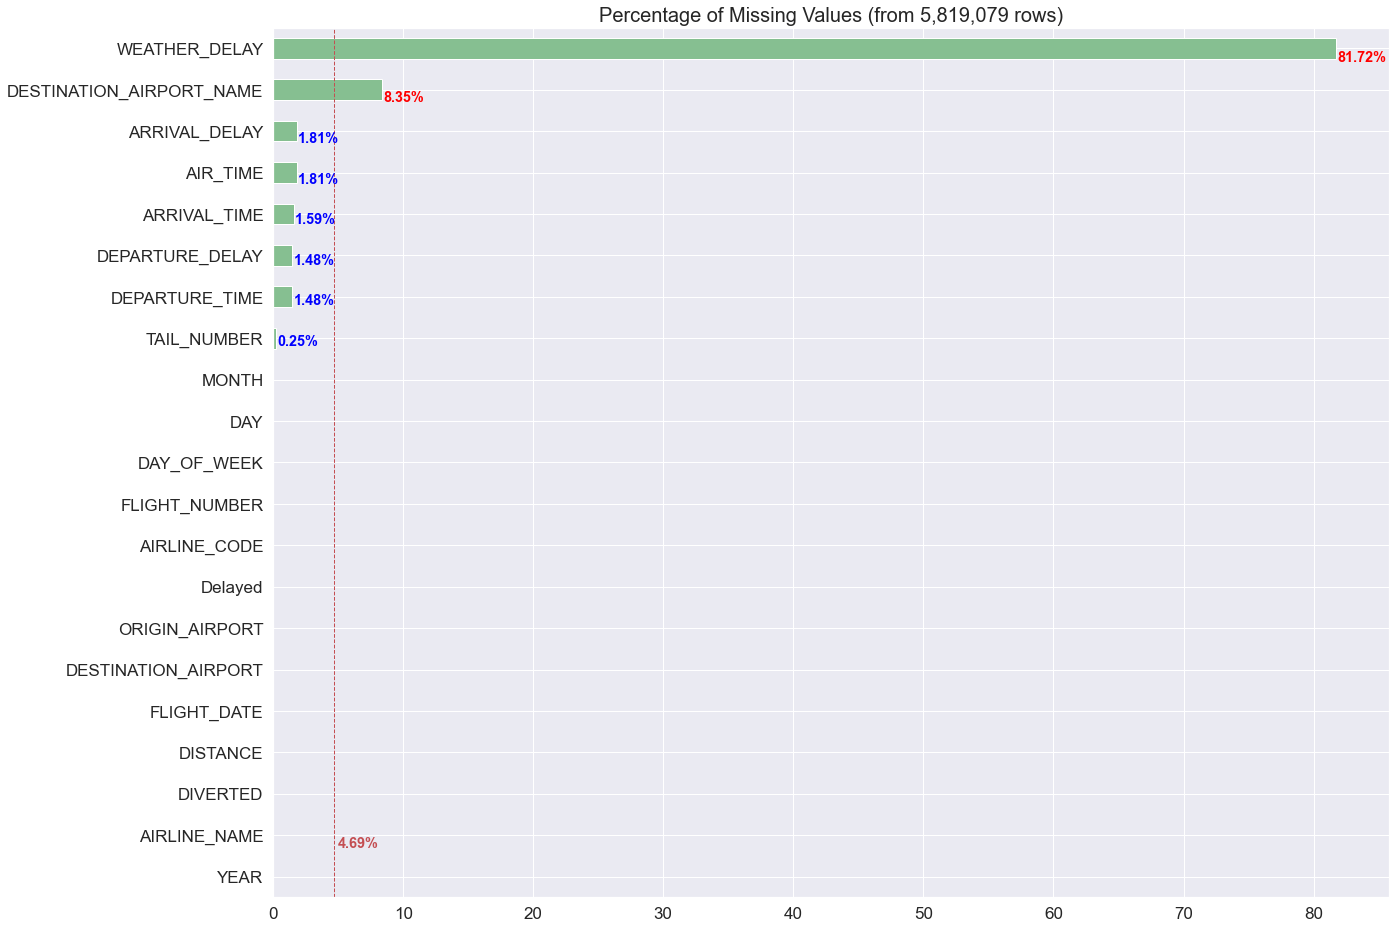

In [122]:
percent_hbar(df_merged)

In [123]:
df_merged.dropna(subset=['TAIL_NUMBER', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'], inplace=True)
df_merged.isnull().sum()

YEAR                              0
MONTH                             0
DAY                               0
DAY_OF_WEEK                       0
FLIGHT_NUMBER                     0
AIRLINE_CODE                      0
TAIL_NUMBER                       0
ORIGIN_AIRPORT                    0
DESTINATION_AIRPORT               0
DEPARTURE_TIME                    0
ARRIVAL_TIME                      0
AIR_TIME                          0
DISTANCE                          0
DEPARTURE_DELAY                   0
ARRIVAL_DELAY                     0
DIVERTED                          0
WEATHER_DELAY               4650569
AIRLINE_NAME                      0
DESTINATION_AIRPORT_NAME     482878
FLIGHT_DATE                       0
Delayed                           0
dtype: int64

In [124]:
df_merged.WEATHER_DELAY.fillna(0, inplace=True)
df_merged.isnull().sum()

YEAR                             0
MONTH                            0
DAY                              0
DAY_OF_WEEK                      0
FLIGHT_NUMBER                    0
AIRLINE_CODE                     0
TAIL_NUMBER                      0
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
DEPARTURE_TIME                   0
ARRIVAL_TIME                     0
AIR_TIME                         0
DISTANCE                         0
DEPARTURE_DELAY                  0
ARRIVAL_DELAY                    0
DIVERTED                         0
WEATHER_DELAY                    0
AIRLINE_NAME                     0
DESTINATION_AIRPORT_NAME    482878
FLIGHT_DATE                      0
Delayed                          0
dtype: int64

In [125]:
# check duplicated rows
df_merged.duplicated().sum()

0

# Weather Data

In [126]:
weather = pd.read_csv('../data/raw/weather_table.csv')
weather

,STATION,NAME,DATE,AWND,PRCP,SNOW,TMAX,TMIN,airport_code
0,USW00024131,"BOISE AIR TERMINAL, ID US",2015-01-01,2.01,0.00,0.0,18.0,6.0,BOI
1,USW00024131,"BOISE AIR TERMINAL, ID US",2015-01-02,3.36,0.00,0.0,20.0,8.0,BOI
2,USW00024131,"BOISE AIR TERMINAL, ID US",2015-01-03,3.36,0.00,0.0,25.0,12.0,BOI
3,USW00024131,"BOISE AIR TERMINAL, ID US",2015-01-04,1.12,0.02,0.1,32.0,19.0,BOI
4,USW00024131,"BOISE AIR TERMINAL, ID US",2015-01-05,3.58,0.11,0.1,39.0,29.0,BOI
...,...,...,...,...,...,...,...,...,...
21889,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-27,4.47,0.01,0.0,48.0,34.0,SFO
21890,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-28,5.14,0.11,0.0,48.0,41.0,SFO
21891,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-29,2.91,0.00,0.0,54.0,36.0,SFO
21892,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-30,6.93,0.01,0.0,49.0,40.0,SFO


In [127]:
weather.isnull().sum()

STATION         0
NAME            0
DATE            0
AWND            0
PRCP            0
SNOW            0
TMAX            0
TMIN            0
airport_code    0
dtype: int64

In [128]:
weather.dtypes

STATION          object
NAME             object
DATE             object
AWND            float64
PRCP            float64
SNOW            float64
TMAX            float64
TMIN            float64
airport_code     object
dtype: object

In [129]:
weather.DATE = pd.to_datetime(weather.DATE)
weather.dtypes

STATION                 object
NAME                    object
DATE            datetime64[ns]
AWND                   float64
PRCP                   float64
SNOW                   float64
TMAX                   float64
TMIN                   float64
airport_code            object
dtype: object

In [130]:
cols = ['DATE', 'AWND', 'PRCP', 'SNOW', 'TMAX', 'TMIN', 'airport_code']
df_merged_weather = pd.merge_ordered(df_merged, weather[cols], left_on=('DESTINATION_AIRPORT', 'FLIGHT_DATE'), right_on=('airport_code', 'DATE'), how='left')
df_merged_weather.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY,AIRLINE_NAME,DESTINATION_AIRPORT_NAME,FLIGHT_DATE,Delayed,DATE,AWND,PRCP,SNOW,TMAX,TMIN,airport_code
0,2015,10,1,4,2582,DL,N993AT,10397,10135,2103.0,2257.0,88.0,692,-3.0,-14.0,0,0.0,Delta Air Lines Inc.,NaN,2015-10-01,False,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,10,1,4,4940,EV,N851AS,10397,10135,1024.0,1216.0,92.0,692,-3.0,-14.0,0,0.0,Atlantic Southeast Airlines,NaN,2015-10-01,False,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,10,1,4,5969,EV,N11551,13930,10135,1353.0,1658.0,91.0,655,-4.0,6.0,0,0.0,Atlantic Southeast Airlines,NaN,2015-10-01,False,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,10,1,4,5151,EV,N858AS,11433,10135,1359.0,1521.0,62.0,425,-3.0,-8.0,0,0.0,Atlantic Southeast Airlines,NaN,2015-10-01,False,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,10,1,4,5197,EV,N849AS,10397,10135,1444.0,1645.0,102.0,692,0.0,-1.0,0,0.0,Atlantic Southeast Airlines,NaN,2015-10-01,False,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df_merged_weather.shape

(5714008, 28)

In [132]:
df_merged_weather.isnull().sum()

YEAR                              0
MONTH                             0
DAY                               0
DAY_OF_WEEK                       0
FLIGHT_NUMBER                     0
AIRLINE_CODE                      0
TAIL_NUMBER                       0
ORIGIN_AIRPORT                    0
DESTINATION_AIRPORT               0
DEPARTURE_TIME                    0
ARRIVAL_TIME                      0
AIR_TIME                          0
DISTANCE                          0
DEPARTURE_DELAY                   0
ARRIVAL_DELAY                     0
DIVERTED                          0
WEATHER_DELAY                     0
AIRLINE_NAME                      0
DESTINATION_AIRPORT_NAME     482878
FLIGHT_DATE                       0
Delayed                           0
DATE                        1871947
AWND                        1871947
PRCP                        1871947
SNOW                        1871947
TMAX                        1871947
TMIN                        1871947
airport_code                

In [133]:
"""changing the column names from snake case to camel case"""

# change the column names from upper case to lower case
df_merged_weather.columns = df_merged_weather.columns.str.lower().str.replace('_', ' ')
# change the first letter of each column name to upper case
df_merged_weather.columns = df_merged_weather.columns.str.title()
df_merged_weather.columns = df_merged_weather.columns.str.replace(' ', '')
df_merged_weather.columns

# change the column names from upper case to lower case
df_merged.columns = df_merged.columns.str.lower().str.replace('_', ' ')
# change the first letter of each column name to upper case
df_merged.columns = df_merged.columns.str.title()
df_merged.columns = df_merged.columns.str.replace(' ', '')
df_merged.columns

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'FlightNumber', 'AirlineCode',
       'TailNumber', 'OriginAirport', 'DestinationAirport', 'DepartureTime',
       'ArrivalTime', 'AirTime', 'Distance', 'DepartureDelay', 'ArrivalDelay',
       'Diverted', 'WeatherDelay', 'AirlineName', 'DestinationAirportName',
       'FlightDate', 'Delayed'],
      dtype='object')

In [134]:
df_merged_weather.to_csv('../data/processed/flights_weather.csv', index=False)
df_merged.to_csv('../data/processed/flights.csv', index=False)

In [135]:
df_merged_weather.isnull().sum()

Year                            0
Month                           0
Day                             0
DayOfWeek                       0
FlightNumber                    0
AirlineCode                     0
TailNumber                      0
OriginAirport                   0
DestinationAirport              0
DepartureTime                   0
ArrivalTime                     0
AirTime                         0
Distance                        0
DepartureDelay                  0
ArrivalDelay                    0
Diverted                        0
WeatherDelay                    0
AirlineName                     0
DestinationAirportName     482878
FlightDate                      0
Delayed                         0
Date                      1871947
Awnd                      1871947
Prcp                      1871947
Snow                      1871947
Tmax                      1871947
Tmin                      1871947
AirportCode               1871947
dtype: int64

: 